In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data = load_iris(as_frame=True)
df = data.frame.drop(columns=["target"])
X = StandardScaler().fit_transform(df) 





In [2]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


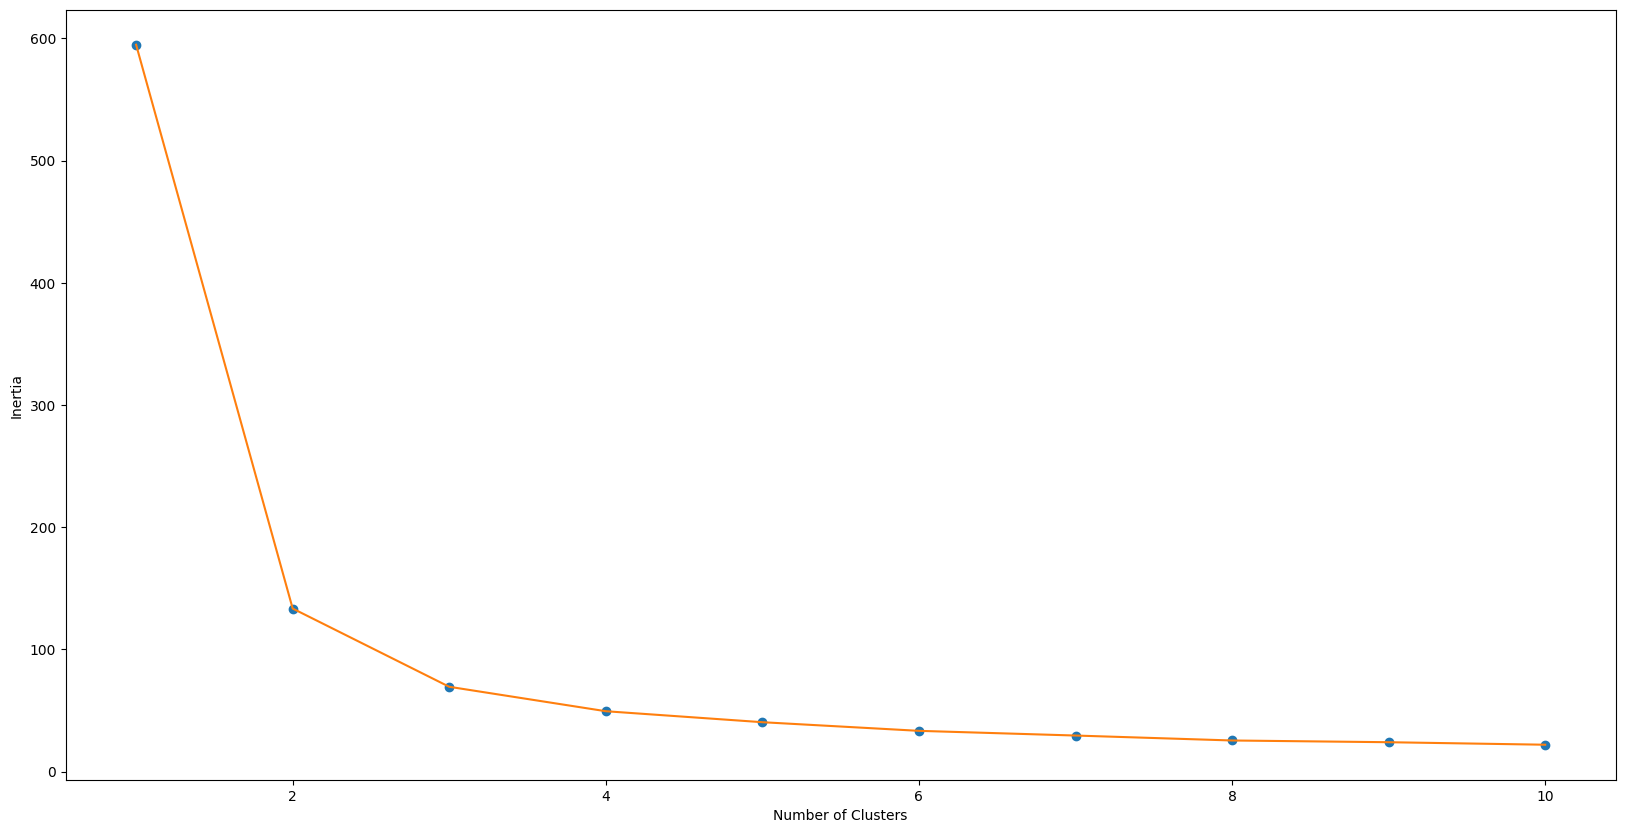

In [3]:
from sklearn.cluster import KMeans

X1= df.loc[:, ['sepal length (cm)' , 'sepal width (cm)' , 'petal length (cm)']].values
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n,
               init='k-means++',
               max_iter=500,
                #n_init =4,
               random_state=42)
    model.fit(X1)
    inertia.append(model.inertia_)
    
plt.figure(1 , figsize = (20, 10))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [7]:
df['cluster'].unique()

array([1, 0], dtype=int32)

In [8]:
model = KMeans(n_clusters = 2,
            init='k-means++',

            max_iter=500,
            random_state=42)
model.fit(X1)
labels = model.labels_


df['cluster'] =  labels
df.head(100)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,0
96,5.7,2.9,4.2,1.3,0
97,6.2,2.9,4.3,1.3,0
98,5.1,2.5,3.0,1.1,1


In [5]:
import plotly.express as px
fig = px.scatter_3d(df,
                    x="sepal length (cm)",
                    y="sepal width (cm)",
                    z="petal length (cm)",
                    color='cluster',
                    hover_data=["sepal length (cm)",
                                "sepal width (cm)",
                                "petal length (cm)"],
                    category_orders = {"cluster": range(0, 5)},
                    )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


● Provide a brief description of how KMeans clustering works.

ANSWER : 

KMeans clustering is an unsupervised learning algorithm that groups data into k clusters. It works by:

Choosing k initial centroids.

Assigning each data point to the nearest centroid.

Recomputing centroids as the mean of points in each cluster.

Repeating steps 2–3 until centroids don’t change.

FINAL RESULT : ALL GROUP WITH SIMILAR PROPERTY IS JOINED TOGHETHER 
IN THE FIGURE IT IS EVIDENT THAT THE GROUP WITH SIMILAR PROPERTY IS GROPUED TOGETHER AND IT IS EASY TO CLASSIFY THE DATA . 

THE 3 FEATURES TAKEN IS GROUPED TOGHETHER HERE AND SO FROM THE FIGURE IT IS EASY TO CLASSIFY THE DATA AND MAKE ASSUMPTIONS AND INTERPRETIATIONS 

● Explain why KMeans clustering might be suitable for the Iris dataset.

ANSWER :

KMeans is good for the Iris dataset because it can group similar flowers based on their measurements like sepal and petal size. The dataset has three species, which often form distinct clusters. Since all features are numeric, KMeans can easily use distances to separate the groups.

2. Hierarchical Clustering (4 marks):

In [ ]:

X1= df.loc[:, ['sepal length (cm)' , 'sepal width (cm)' , 'petal length (cm)']].values

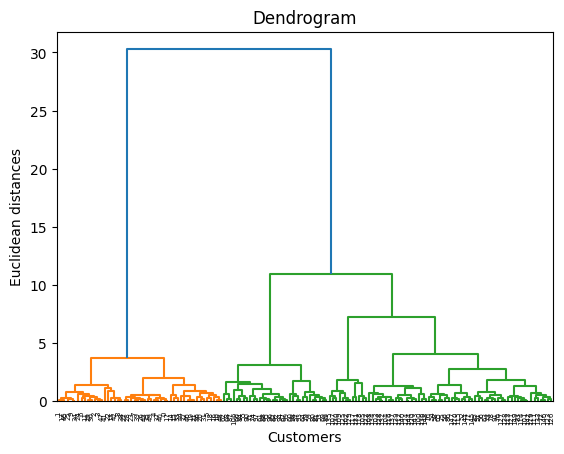

In [9]:
import scipy.cluster.hierarchy as sc
dendrogram = sc.dendrogram(sc.linkage(X1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [11]:

from sklearn.cluster import AgglomerativeClustering
hca = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
y_hca = hca.fit_predict(X1)

In [12]:
y_hca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
df['cluster_hcs'] = y_hca

In [18]:
df.head(100)

## print(f'UNIQUE CLUSTER VALUE IS {df['cluster_hcs'].unique()}')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,cluster_hcs
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,0,0
96,5.7,2.9,4.2,1.3,0,0
97,6.2,2.9,4.3,1.3,0,0
98,5.1,2.5,3.0,1.1,1,0


In [19]:
print(f'UNIQUE CLUSTER VALUE IS {df['cluster_hcs'].unique()}')

UNIQUE CLUSTER VALUE IS [1 0]


In [20]:
import plotly.express as px
fig = px.scatter_3d(df,
                    x="sepal length (cm)",
                    y="sepal width (cm)",
                    z="petal length (cm)",
                    color='cluster',
                    hover_data=["sepal length (cm)",
                                "sepal width (cm)",
                                "petal length (cm)"],
                    category_orders = {"cluster": range(0, 5)},
                    )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Provide a brief description of how Hierarchical clustering works.

ANSWER :

Agglomerative hierarchical clustering is a bottom-up approach.
It starts with each data point as its own cluster.
At each step, it merges the two closest clusters based on distance.
This continues until all points form a single cluster.
The result can be shown as a dendrogram to visualize cluster relationships.

Hierarchical clustering is good for the Iris dataset because it groups flowers step by step, showing which ones are more similar.

You don’t need to decide the number of clusters in advance.

It can capture how species are related based on their features.

The dendrogram makes it easy to see clusters and sub-clusters visually.